<a href="https://colab.research.google.com/github/hyerin0113/tobigs14_assign/blob/master/Week3_KNN_Clustering/week3(KNN)_assignment_hyerinlee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Assignment_투빅스 14기 이혜린

## 1. Preprocessing & EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 데이터 로드

In [7]:
df = pd.read_csv('/content/drive/My Drive/Tobigs14/Week3_Knn&Clustering/Iris.csv')
df = df.drop(['Id'], axis=1)
df = pd.DataFrame(df)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 결측치 확인

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 분포 확인

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Pairplot

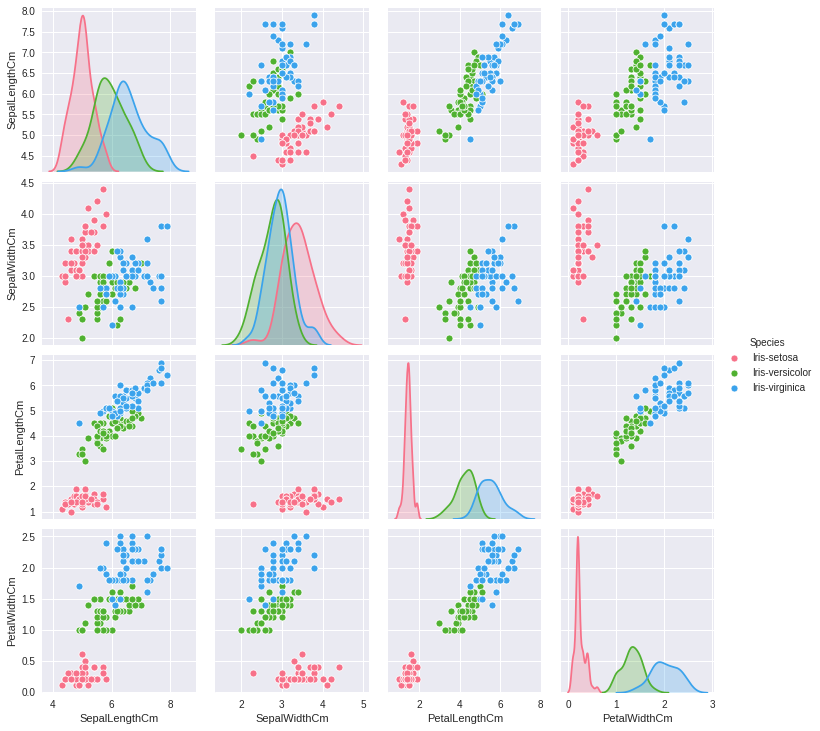

In [10]:
sns.pairplot(df, hue='Species', palette='husl')

setosa 그룹과 나머지 그룹은 뚜렷하게 구분되는 편이다.

### Scatter Plot

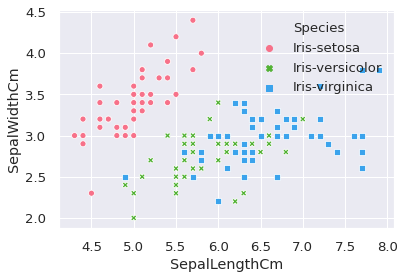

In [11]:
sns.set(font_scale=1.2)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data=df, hue='Species', style='Species', palette='husl')

x = `SepalLength`, y = `SepalWidth`인 scatter plot을 그린 결과 setosa group은 거의 분류가능한 반면,   
versicolor와 virginica 그룹은 섞여 있어 분류가 힘든 것을 볼 수 있다.

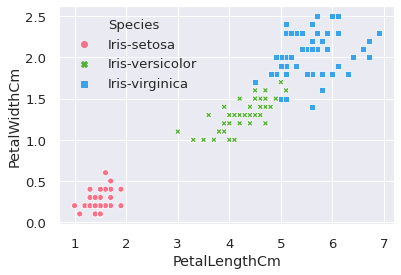

In [12]:
sns.set(font_scale=1.2)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data=df, hue='Species', style='Species', palette='husl')

x = `PetalLength`, y = `PetalWidth`인 scatter plot을 그린 결과, 그룹별로 뚜렷하게 분류가능함을 알 수 있다.

또한 pairplot과 describe 등을 살펴본 결과 각 변수는 모두 결측치가 없으므로 따로 조치를 취하진 않는다.


In [13]:
X = df.drop('Species', axis=1)
raw_y = df['Species']

In [14]:
print('X:',X.shape, ', y:',raw_y.shape) # obs = 150

X: (150, 4) , y: (150,)


In [15]:
print(raw_y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


### 범주형 변수 OneHotEncoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
raw_y = np.array(raw_y)
encoder.fit(raw_y.reshape(-1,1))
y = encoder.transform(raw_y.reshape(-1,1)).toarray() # toarray()를 사용해야 정상적으로 one-hot-encoding 가능

### Train, Test 분리

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

데이터의 개수가 많지 않으므로(obs = 150) test_size를 0.2로 설정하였다.

KNN은 거리에 민감한 모델이기 때문에 scaling을 진행해준다.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {
    'n_neighbors' : [1, 3, 5, 7, 9], 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'mahalanobis']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1) # 3-fold CV
gs_result = gs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


In [22]:
gs_result.cv_results_

{'mean_fit_time': array([0.00164986, 0.00089447, 0.00086816, 0.00087531, 0.00089018,
        0.00086753, 0.00086522, 0.00083804, 0.00086141, 0.00083017,
        0.00084265, 0.00078853, 0.00081555, 0.00084678, 0.0008227 ,
        0.00087468, 0.00085123, 0.00086347, 0.00093102, 0.0009048 ,
        0.00085791, 0.0007263 , 0.00066439, 0.00065867, 0.00070047,
        0.00077009, 0.00100017, 0.00121339, 0.00136065, 0.00069952]),
 'mean_score_time': array([0.01096177, 0.00289782, 0.00873017, 0.00351199, 0.0095764 ,
        0.0030632 , 0.00969561, 0.00311017, 0.0096155 , 0.00423018,
        0.00861009, 0.0028282 , 0.00978104, 0.00313624, 0.00884287,
        0.00309944, 0.00876888, 0.00378553, 0.00965444, 0.00318662,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'mean_test_score': array([0.93333333, 0.93333333, 0.93333333, 0.95      , 0.95      ,
        0.95833333, 0.94166667, 0.95833333, 0.95      , 0

In [23]:
print(gs_result.best_score_)
print(gs_result.best_params_)

0.9666666666666667
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


위 결과를 토대로 최종 모델을 만든다.

In [24]:
knn_cl = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [25]:
knn_cl.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

## 3. Evaluation

### Accuracy

In [26]:
print('Test data로 구한 accuracy : {}'.format(knn_cl.score(X_test, y_test)))

Test data로 구한 accuracy : 0.9333333333333333


### Prediction of New Data

In [28]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(knn_cl.predict(X_new))
print("예측한 타깃의 이름: virginica")

[[0. 0. 1.]]
예측한 타깃의 이름: virginica


## 4. Key Point & Limitation  
  
### Key Point 
1. Uniform KNN이, Weighted KNN보다 더 좋은 모델로 선택되었다.  
2. Weight를 부여할 때 사용된 distance는 euclidean, manhattan, mahalanobis이고 이 중 optimal method는 manhattan 이었다.  
3. K의 개수는 일반적으로 홀수를 사용함을 잊지말자.  
  
  
### Limitation  
1. KNN의 경우 데이터의 개수가 많을수록 좋은 성능을 보이는데, 위 분석의 경우 데이터의 개수가 충분하지 않았다.